#### Importing packages and data

In [2]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score
from sklearn.metrics import confusion_matrix

In [3]:
data = pd.read_csv("Ocena subskrypcji.csv", sep=';')

print(data.head(n=5))

   age           job  marital  education default  balance housing loan  \
0   58    management  married   tertiary      no     2143     yes   no   
1   44    technician   single  secondary      no       29     yes   no   
2   33  entrepreneur  married  secondary      no        2     yes  yes   
3   47   blue-collar  married    unknown      no     1506     yes   no   
4   33       unknown   single    unknown      no        1      no   no   

   contact  day month  duration  campaign  pdays  previous poutcome   y  
0  unknown    5   may       261         1     -1         0  unknown  no  
1  unknown    5   may       151         1     -1         0  unknown  no  
2  unknown    5   may        76         1     -1         0  unknown  no  
3  unknown    5   may        92         1     -1         0  unknown  no  
4  unknown    5   may       198         1     -1         0  unknown  no  


#### Checking missing values

In [4]:
print(data.isnull().sum())

age          0
job          0
marital      0
education    0
default      0
balance      0
housing      0
loan         0
contact      0
day          0
month        0
duration     0
campaign     0
pdays        0
previous     0
poutcome     0
y            0
dtype: int64


#### Client's age analysis

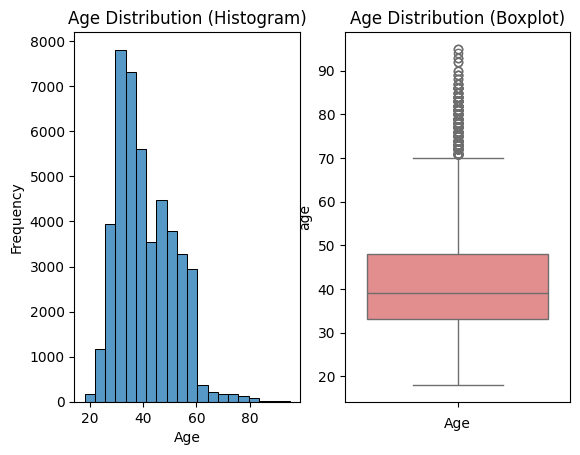

Average client's age:  40.94
Median client's age:  39.0


In [5]:
# Histogram
plt.subplot(1, 2, 1)
sns.histplot(data['age'], bins=20)
plt.title('Age Distribution (Histogram)')
plt.xlabel('Age')
plt.ylabel('Frequency')

# Boxplot
plt.subplot(1, 2, 2)
sns.boxplot(y=data['age'], color='lightcoral')
plt.title('Age Distribution (Boxplot)')
plt.xlabel('Age')

plt.show()

print("Average client's age: ", round(data["age"].mean(), 2))
print("Median client's age: ", round(data["age"].median(), 2))

#### Client's job analysis

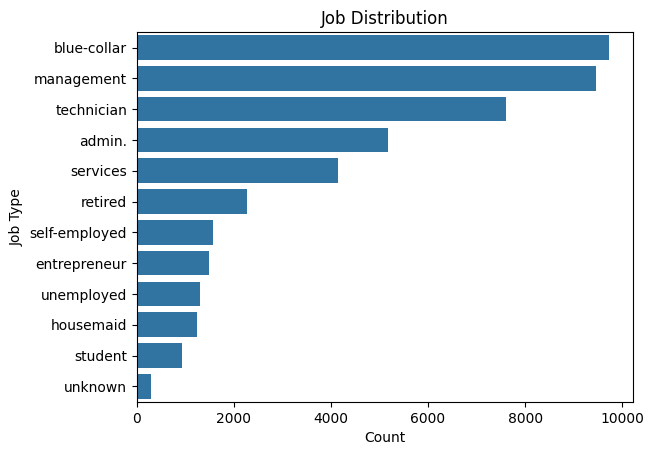

Most common job: blue-collar


In [6]:
sns.countplot(y=data['job'], order=data['job'].value_counts().index)
plt.title("Job Distribution")
plt.xlabel("Count")
plt.ylabel("Job Type")
plt.show()

most_common_job = data['job'].value_counts().idxmax()
print("Most common job:", most_common_job)

#### Client's marital status analysis

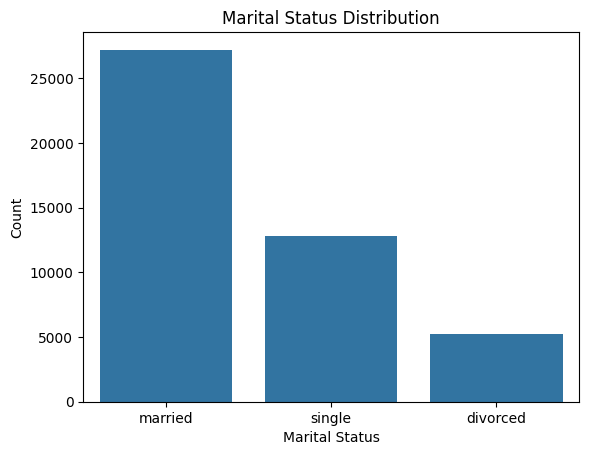

In [7]:
sns.countplot(x=data['marital'], order=data['marital'].value_counts().index)
plt.title("Marital Status Distribution")
plt.xlabel("Marital Status")
plt.ylabel("Count")
plt.show()

#### Client's education analysis

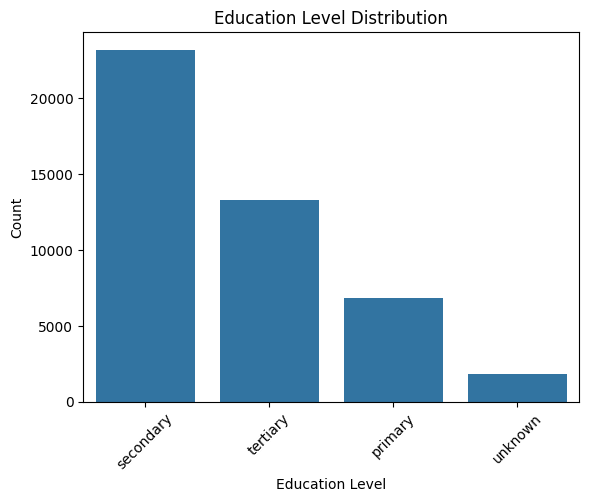

In [8]:
sns.countplot(x=data['education'], order=data['education'].value_counts().index)
plt.title("Education Level Distribution")
plt.xlabel("Education Level")
plt.ylabel("Count")
plt.xticks(rotation=45)
plt.show()

#### Client's default analysis

default
no     44396
yes      815
Name: count, dtype: int64


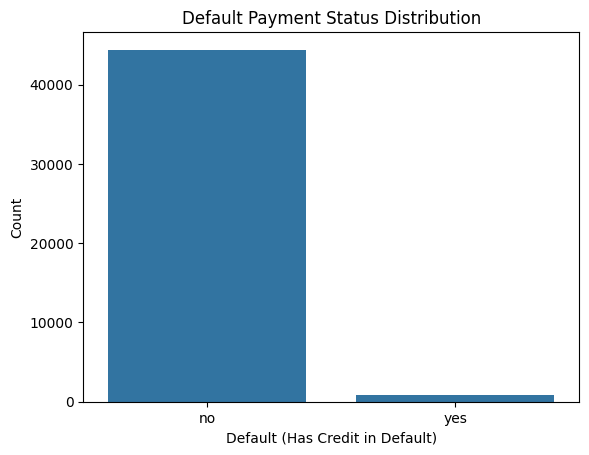

In [9]:
print(data['default'].value_counts())

sns.countplot(x=data['default'], order=data['default'].value_counts().index)
plt.title("Default Payment Status Distribution")
plt.xlabel("Default (Has Credit in Default)")
plt.ylabel("Count")
plt.show()

#### Client's balance analysis

count     45211.000000
mean       1362.272058
std        3044.765829
min       -8019.000000
25%          72.000000
50%         448.000000
75%        1428.000000
max      102127.000000
Name: balance, dtype: float64


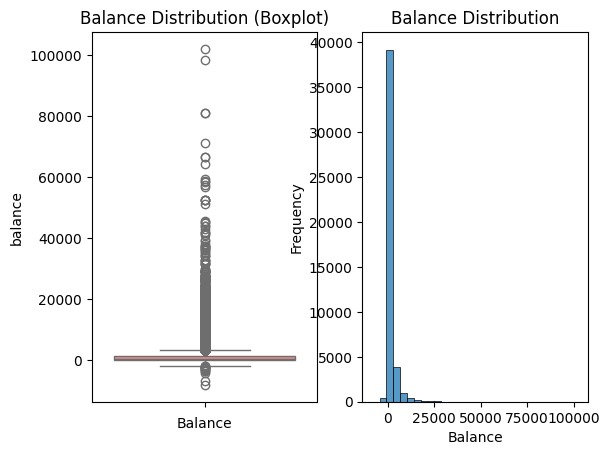

In [10]:
print(data['balance'].describe())

# Boxplot
plt.subplot(1, 2, 1)
sns.boxplot(y=data['balance'], color='lightcoral')
plt.title("Balance Distribution (Boxplot)")
plt.xlabel("Balance")

# Histogram
plt.subplot(1, 2, 2)
sns.histplot(data['balance'], bins=30)
plt.title("Balance Distribution")
plt.xlabel("Balance")
plt.ylabel("Frequency")
plt.show()

#### Client's housing analysis

housing
yes    25130
no     20081
Name: count, dtype: int64


Text(0, 0.5, 'Count')

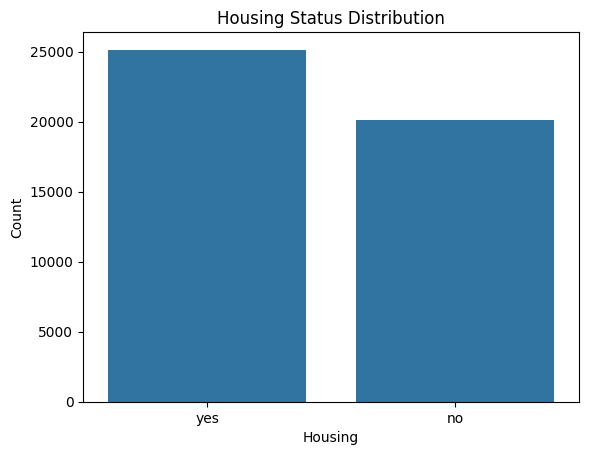

In [11]:
print(data['housing'].value_counts())

sns.countplot(x=data['housing'], order=data['housing'].value_counts().index)
plt.title("Housing Status Distribution")
plt.xlabel("Housing")
plt.ylabel("Count")

#### Client's loan analysis

loan
no     37967
yes     7244
Name: count, dtype: int64


Text(0, 0.5, 'Count')

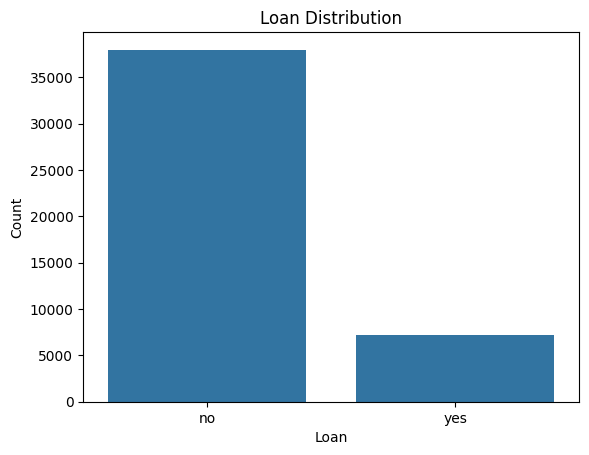

In [12]:
print(data['loan'].value_counts())

sns.countplot(x=data['loan'], order=data['loan'].value_counts().index)
plt.title("Loan Distribution")
plt.xlabel("Loan")
plt.ylabel("Count")

#### Client's contact analysis

contact
cellular     29285
unknown      13020
telephone     2906
Name: count, dtype: int64


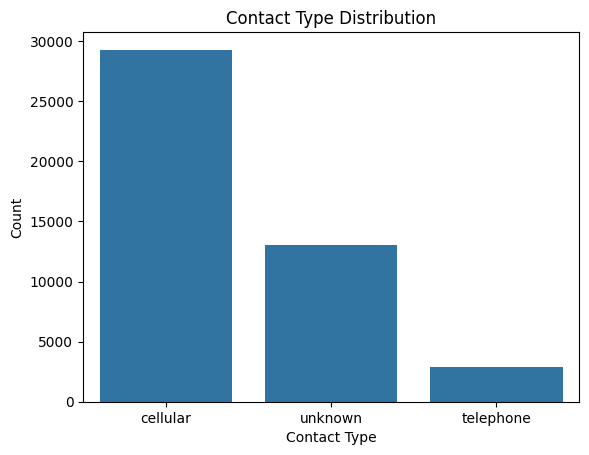

In [13]:
print(data['contact'].value_counts())

sns.countplot(x=data['contact'], order=data['contact'].value_counts().index)
plt.title("Contact Type Distribution")
plt.xlabel("Contact Type")
plt.ylabel("Count")
plt.show()

#### Client's day analysis

day
20    2752
18    2308
21    2026
17    1939
6     1932
5     1910
14    1848
8     1842
28    1830
7     1817
19    1757
29    1745
15    1703
12    1603
13    1585
30    1566
9     1561
11    1479
4     1445
16    1415
2     1293
27    1121
3     1079
26    1035
23     939
22     905
25     840
31     643
10     524
24     447
1      322
Name: count, dtype: int64


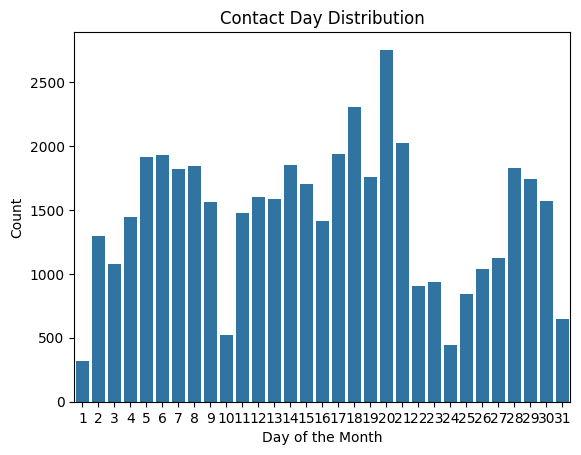

In [14]:
print(data['day'].value_counts())

sns.countplot(x=data['day'])
plt.title("Contact Day Distribution")
plt.xlabel("Day of the Month")
plt.ylabel("Count")
plt.show()

#### Client's month analysis

month
may    13766
jul     6895
aug     6247
jun     5341
nov     3970
apr     2932
feb     2649
jan     1403
oct      738
sep      579
mar      477
dec      214
Name: count, dtype: int64


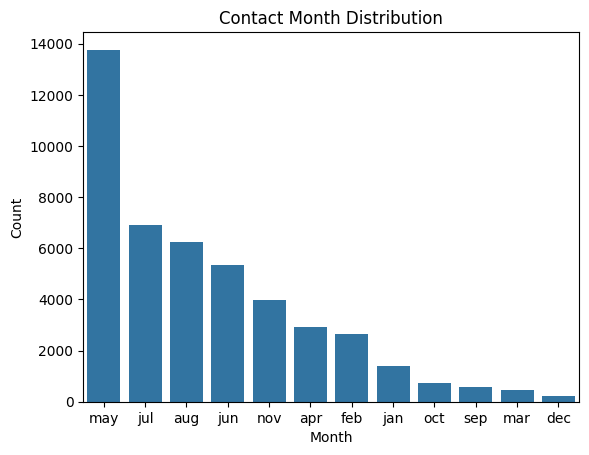

In [15]:
print(data['month'].value_counts())

sns.countplot(x=data['month'], order=data['month'].value_counts().index)
plt.title("Contact Month Distribution")
plt.xlabel("Month")
plt.ylabel("Count")
plt.show()

#### Client's duration analysis

count    45211.000000
mean       258.163080
std        257.527812
min          0.000000
25%        103.000000
50%        180.000000
75%        319.000000
max       4918.000000
Name: duration, dtype: float64


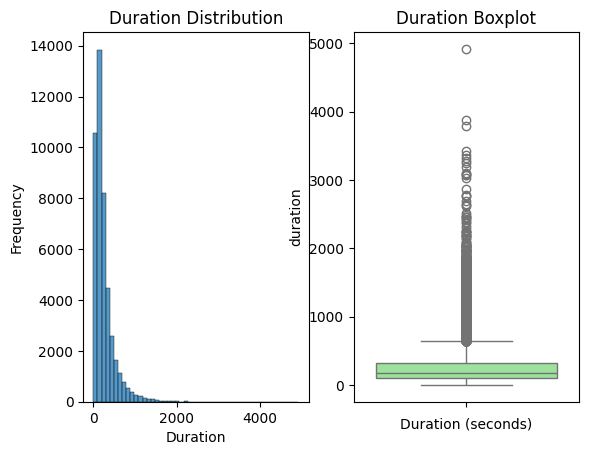

In [16]:
print(data['duration'].describe())

# Histogram
plt.subplot(1, 2, 1)
sns.histplot(data['duration'], bins=50)
plt.title("Duration Distribution")
plt.xlabel("Duration")
plt.ylabel("Frequency")

# Boxplot
plt.subplot(1, 2, 2)
sns.boxplot(y=data['duration'], color="lightgreen")
plt.title("Duration Boxplot")
plt.xlabel("Duration (seconds)")
plt.show()

#### Client's campaign analysis

count    45211.000000
mean         2.763841
std          3.098021
min          1.000000
25%          1.000000
50%          2.000000
75%          3.000000
max         63.000000
Name: campaign, dtype: float64


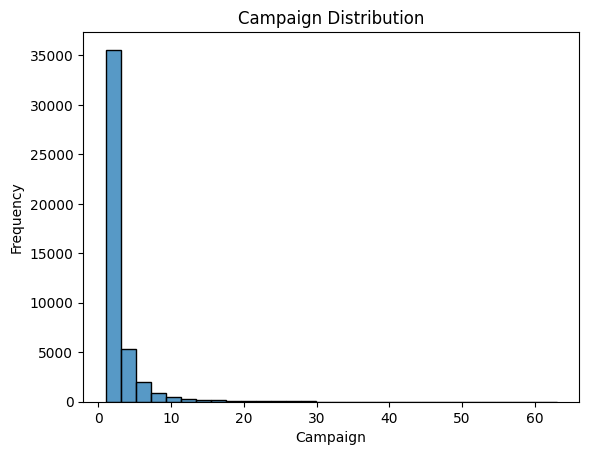

In [17]:
print(data['campaign'].describe())

sns.histplot(data['campaign'], bins=30)
plt.title("Campaign Distribution")
plt.xlabel("Campaign")
plt.ylabel("Frequency")
plt.show()


#### Client's pdays analysis

count    45211.000000
mean        40.197828
std        100.128746
min         -1.000000
25%         -1.000000
50%         -1.000000
75%         -1.000000
max        871.000000
Name: pdays, dtype: float64


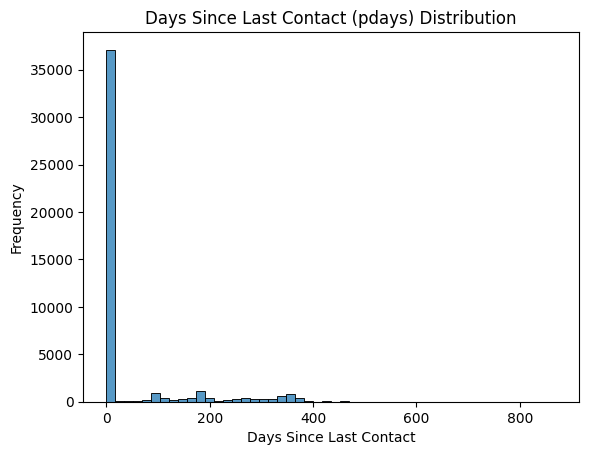

In [18]:
print(data['pdays'].describe())

sns.histplot(data['pdays'], bins=50)
plt.title("Days Since Last Contact (pdays) Distribution")
plt.xlabel("Days Since Last Contact")
plt.ylabel("Frequency")
plt.show()

#### Client's previous analysis

count    45211.000000
mean         0.580323
std          2.303441
min          0.000000
25%          0.000000
50%          0.000000
75%          0.000000
max        275.000000
Name: previous, dtype: float64


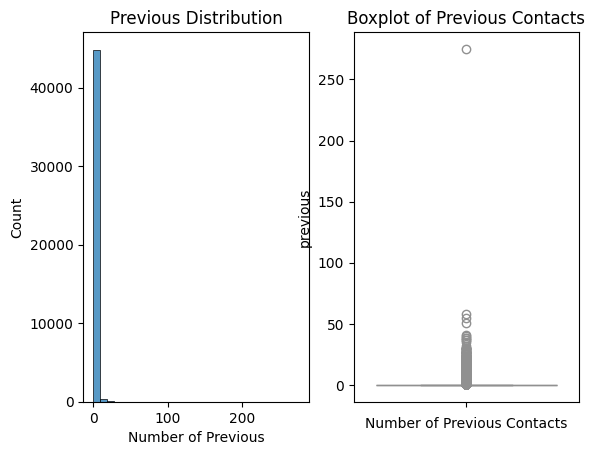

In [20]:
print(data['previous'].describe())

# Histogram
plt.subplot(1, 2, 1)
sns.histplot(data['previous'], bins=30)
plt.title("Previous Distribution")
plt.xlabel("Number of Previous")

# Boxplot
plt.subplot(1, 2, 2)
sns.boxplot(y=data['previous'], color="lightyellow")
plt.title("Boxplot of Previous Contacts")
plt.xlabel("Number of Previous Contacts")
plt.show()

#### Client's outcome analysis

poutcome
unknown    36959
failure     4901
other       1840
success     1511
Name: count, dtype: int64


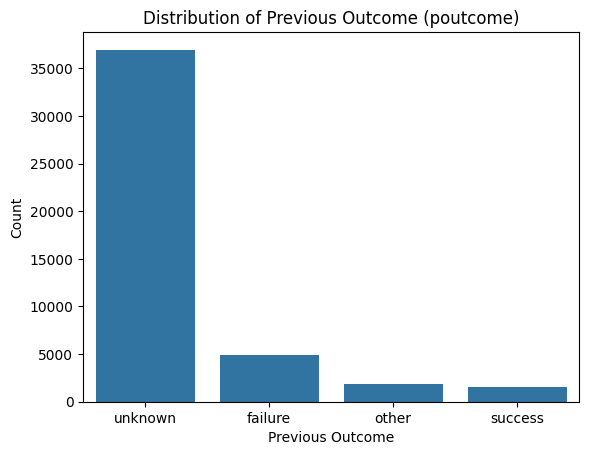

In [21]:
print(data['poutcome'].value_counts())

sns.countplot(x=data['poutcome'])
plt.title("Distribution of Previous Outcome (poutcome)")
plt.xlabel("Previous Outcome")
plt.ylabel("Count")
plt.show()

#### Client's y (dependent variable) analysis

y
no     39922
yes     5289
Name: count, dtype: int64


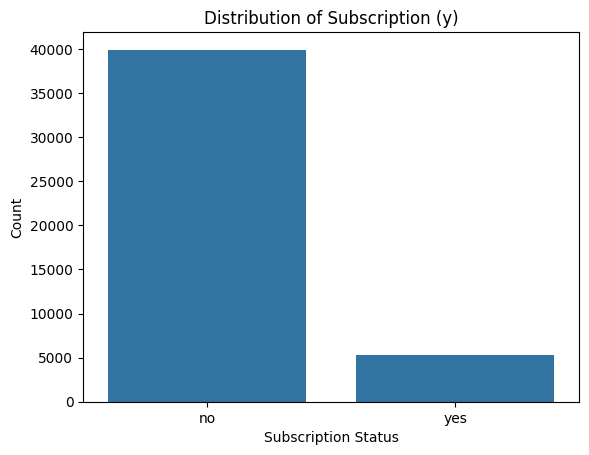

Percentage of clients who subscribed: 11.70%


In [22]:
print(data['y'].value_counts())

sns.countplot(x='y', data=data)
plt.title("Distribution of Subscription (y)")
plt.xlabel("Subscription Status")
plt.ylabel("Count")
plt.show()

subscription_percentage = data['y'].value_counts(normalize=True) * 100

print(f"Percentage of clients who subscribed: {subscription_percentage['yes']:.2f}%")

#### Clean data from outliers

In [23]:
print("Data shape before removing outliers:", data.shape)

def remove_outliers_from_column(data, column):
    Q1 = data[column].quantile(0.25)
    Q3 = data[column].quantile(0.75)
    IQR = Q3 - Q1

    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR

    return data[(data[column] >= lower_bound) & (data[column] <= upper_bound)]

numeric_columns = data.select_dtypes(include=['float64', 'int64']).columns

for column in numeric_columns:
    data = remove_outliers_from_column(data, column)

print("Data shape after removing outliers:", data.shape)

Data shape before removing outliers: (45211, 17)
Data shape after removing outliers: (28069, 17)


#### One-hot encoding & correlation analysis 

C:\Users\filip\AppData\Local\Temp\ipykernel_21536\1871962312.py:1: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  data['y'] = data['y'].replace({'yes': 1, 'no': 0})


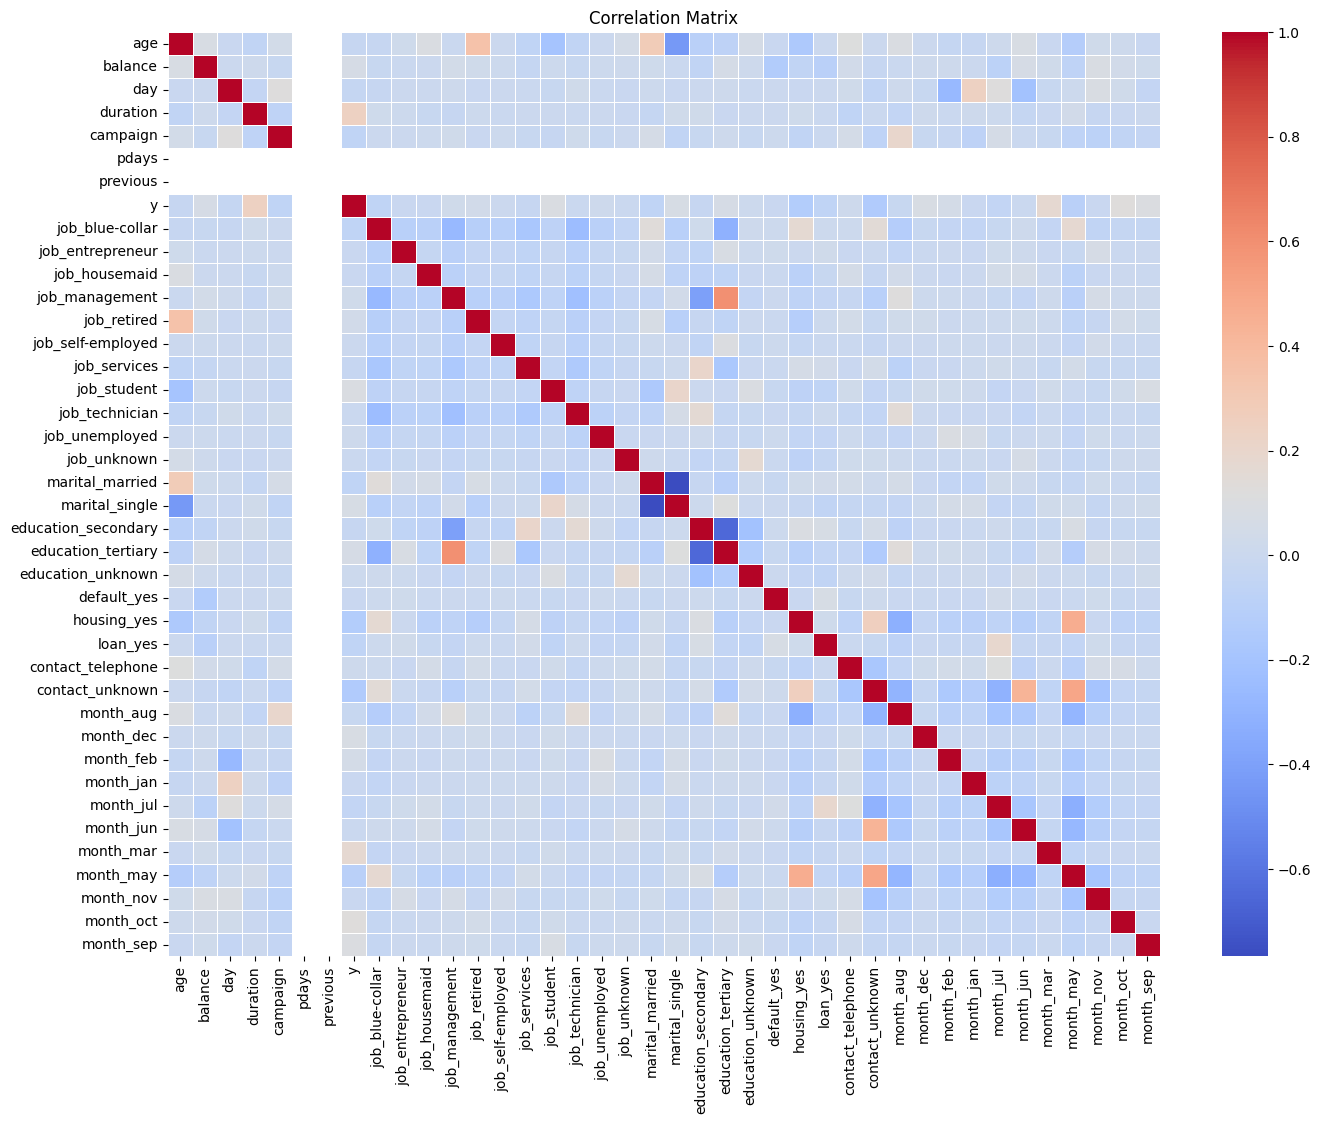

In [24]:
data['y'] = data['y'].replace({'yes': 1, 'no': 0})

non_numeric_columns = data.select_dtypes(exclude=['float64', 'int64']).columns
data_encoded = pd.get_dummies(data, columns=non_numeric_columns, drop_first=True)

correlation_matrix = data_encoded.corr()

plt.figure(figsize=(16, 12))

sns.heatmap(correlation_matrix, annot=False, cmap='coolwarm', fmt='.2f', linewidths=0.5)
plt.title("Correlation Matrix")
plt.show()

#### Classification modeling

In [25]:
X = data_encoded.drop('y', axis=1) 
y = data_encoded['y'] 

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

model = RandomForestClassifier(n_estimators=100, random_state=42)
model.fit(X_train, y_train)

y_pred = model.predict(X_test)

accuracy = accuracy_score(y_test, y_pred)
print(f'Accuracy: {accuracy:.2f}')

cm = confusion_matrix(y_test, y_pred)

print("Confusion matrix:")
print(cm)

Accuracy: 0.95
Confusion matrix:
[[5273   24]
 [ 267   50]]
